<h1>Forecasting number of Air Passengers for next 10 years</h1>

- Importing all the required libraries for analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

- Reading the dataset file and checking the size of file

In [3]:
#data=pd.read_csv(r'C:\Users\manis\Desktop\IBM_Data_science\Air_Passenger\AirPassengers.csv')

path='C:\\Users\\arunk\\Downloads\\Intelli\\IntelliDataSciencePython\\PythonDataScience\\1PythonTrainingToUSe\\DoIt\\DoIt2\\17Mod_TimeSeries\\Air-Passengers-Time-Series-Analysis-master\\Data\\AirPassengers.csv'
data=pd.read_csv(path)
data.shape

(144, 2)

In [4]:
pd.set_option("display.max_rows", None)

In [5]:
#data.head(20)
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


- Creating the 'Date' as Index for data and viewing the dataset

In [6]:
print(data.info())
print(data.describe())
print(data.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
          Month
count       144
unique      144
top     1951-02
freq          1


In [9]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
print(data.head())
print(data.tail())


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
            Passengers
Month                 
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


# Exploring the dataset 

# Check the Stationarity of data ?  (Method 1) Visual-Mean+Std charts (Method 2) ADF Augmented Dickey Fuller 

# Check the Stationarity of data ? (Method 1) Visual-Mean+Std charts

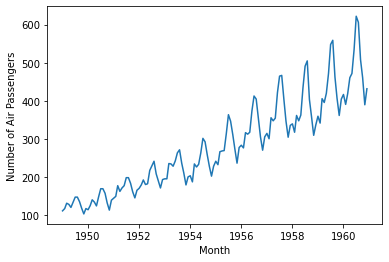

In [12]:
#plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)
plt.show()

# Check Data Stationarity ? using Rolling - Mean and Std

In [15]:
#rolmean=data.rolling(window=12).mean()
#rolling window means how many rows it is considering calculating the mean.
#rolmean=data.rolling(window=2).mean(), 2 means 2 rows. 12 means 12 rows

print(pd.options.display.max_rows)
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
#display all the rows
pd.options.display.max_rows
print(rolmean,rolstd)


None
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
1950-04-01  128.833333
1950-05-01  129.166667
1950-06-01  130.333333
1950-07-01  132.166667
1950-08-01  134.000000
1950-09-01  135.833333
1950-10-01  137.000000
1950-11-01  137.833333
1950-12-01  139.666667
1951-01-01  142.166667
1951-02-01  144.166667
1951-03-01  147.250000
1951-04-01  149.583333
1951-05-01  153.500000
1951-06-01  155.916667
1951-07-01  158.333333
1951-08-01  160.750000
1951-09-01  162.916667
1951-10-01  165.333333
1951-11-01  168.000000
1951-12-01  170.166667
1952-01-01  172.333333
1952-02-01  174.833333
1952-03-01  176.083333
1952-04-01  177.583333
1952-05-01  178.500000
1952-0

In [ ]:

#print(rolmean.head(15)) 
# has NA in the first 12 rows and it contains the means of the first 12 rows in #print(data.head(15)) 

In [16]:
print(data.head(15))
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
1949-06-01         135
1949-07-01         148
1949-08-01         148
1949-09-01         136
1949-10-01         119
1949-11-01         104
1949-12-01         118
1950-01-01         115
1950-02-01         126
1950-03-01         141
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01 

# Check Data Stationarity ? Visual Data of using Rolling - Mean and Std 

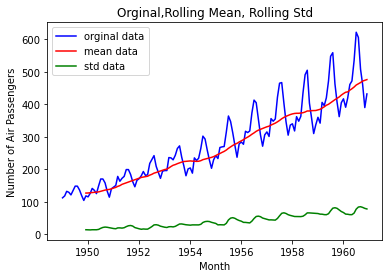

In [19]:
#plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")

org=plt.plot(data,color='blue',label='orginal data')
mean=plt.plot(rolmean,color='red',label='mean data')
std=plt.plot(rolstd,color='green',label='std data')
plt.legend(loc='best')
plt.title('Orginal,Rolling Mean, Rolling Std')
plt.show()

# Another method to  Check  Stationarity ? using Augmented Dickey-Fuller Test

In [18]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


# Create a function test_stationarity - to visually test and to use Augumented Dickey Fuller test

In [22]:
def test_stationarity(timeseries):
    
    #plot rolling statistics
    
    org=plt.plot(timeseries,color='blue',label='orginal data')
    mean=plt.plot(timeseries.rolling(window=12).mean(),color='red',label='mean data')
    std=plt.plot(timeseries.rolling(window=12).std(),color='green',label='std data')
    
    plt.legend(loc='best')
    plt.title('Orginal,Rolling Mean, Rolling Std')
    
    plt.xlabel("Month")
    plt.ylabel("Number of Air Passengers")
    
    plt.show()
    
    #plot rolling statistics
    from statsmodels.tsa.stattools import adfuller

    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

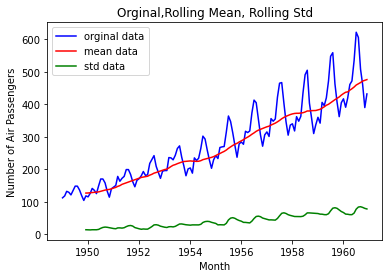

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [23]:
test_stationarity(data)

# Converting Non Stationary Dataset to Stationary

1)Log<br>
2)Differencing Simple Moving Average(Substracting Simple Rolling Averages)<br>
3)Differencing Exponential Moving Averages(Substracting Exponential Rolling Averages)<br>
4)Substracting Previous Value (Most Popular) with Shift. Subtracting each value from its previous value.<br>
5)Seasonal Decomposition. <br>


# Method 1-log- transformation to make our Time series stationary

- Below we took log transformation to make our Time series stationary and plotted visual for it
- We found graph upward trending over time with seasonality 

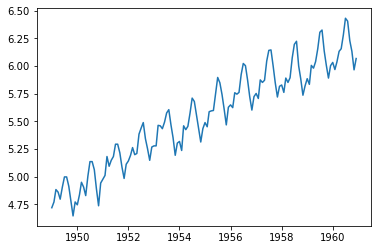

In [20]:
#plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)
plt.show()

# # Check Stationarity Visually ? by Testing with Rolling - Mean and Std on log data

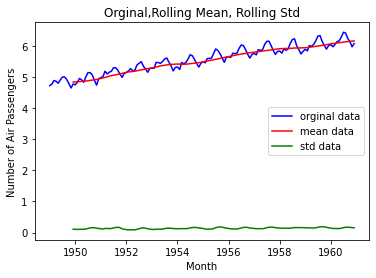

Dickey-Fuller Test: 
Test Statistic           -1.717017
p-value                   0.422367
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [24]:
test_stationarity(data_log)

# Method 2)Differencing Simple Moving Average(Substracting Simple Rolling Averages)

In [25]:

MAvg=data_log.rolling(window=12).mean()

print(MAvg.head(12))

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01    4.836178


In [27]:
data_log_subtract_MAvg=data_log-MAvg
print(data_log_subtract_MAvg.head(12))


            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494


In [28]:
data_log_subtract_MAvg.dropna(inplace=True)
print(data_log_subtract_MAvg.head(12))

            Passengers
Month                 
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379


See the chart below. Here the read and green is not changing much. It is almost like a straight line. Also the P-value is 0.022235 and it is less than .05. That means the data is now stationary.Which means Simple MVA is giving us stationarity Dataset

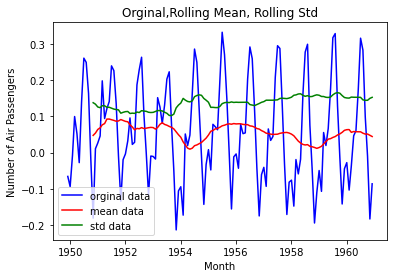

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [29]:
test_stationarity(data_log_subtract_MAvg)

# Method 3)Differencing Exponential Moving Averages(Substracting Exponential Rolling Averages)<br>

In [30]:
exponentialMVA=data_log.ewm (halflife=12,min_periods=0,adjust=True).mean()

In [31]:
data_log_subtract_exponentialMVA=data_log-exponentialMVA
data_log_subtract_exponentialMVA.dropna(inplace=True)

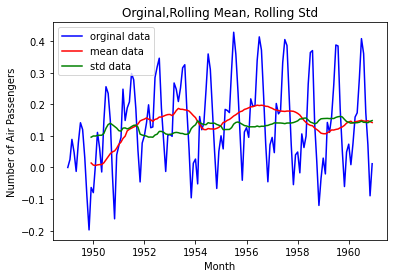

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [32]:
test_stationarity(data_log_subtract_exponentialMVA)

# 4)Substracting Previous Value (Most Popular) with Shift. Subtracting each value from its previous value.

In [33]:
logShift=data_log.shift()

In [34]:
logShift.head(10)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,4.718499
1949-03-01,4.770685
1949-04-01,4.882802
1949-05-01,4.859812
1949-06-01,4.795791
1949-07-01,4.905275
1949-08-01,4.997212
1949-09-01,4.997212


In [35]:
data_shift=data_log-logShift


In [36]:
print(data_shift.head())
print(data_log.head())

            Passengers
Month                 
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
            Passengers
Month                 
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791


See the chart below. Here The p-value 0.071121 and it is MORE than .05. That means the data is now NOT stationary.
Which means SHIFT is giving NOT giving us stationarity Dataset

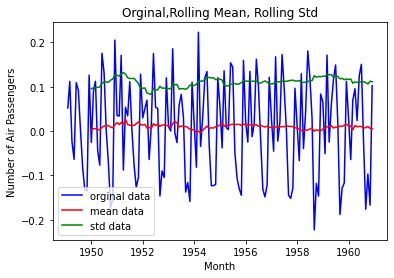

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [37]:
data_shift.dropna(inplace=True)
test_stationarity(data_shift)

# Method 5)Seasonal Decomposition. 

- Decomposing Time Series into its components : Trend, Seasonality and Residual

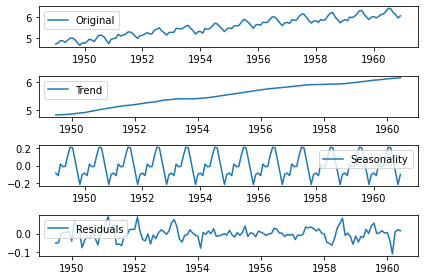

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')


plt.legend(loc='best')
plt.tight_layout()
#****



In [ ]:
print(residual)

- Checking the stationarity of Time Series components

# Now let us find the lags using ACF, PACF

Text(0.5, 1.0, 'Partial Autocorrelation Function')

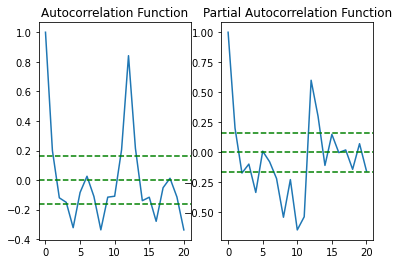

In [39]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

#plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

- Building the ARIMA model with p=2, q=2 and I=1

# Using arma_order_select_ic to get the value of P and Q

Here the values of 'bic_min_order': (2, 2)}, here the value of P=2 and Q=2

In [67]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [68]:
#arma_order_select_ic(data_shift)
arma_order_select_ic(data_log_subtract_exponentialMVA)

{'bic':             0           1           2
 0 -158.511120 -257.250251 -263.047178
 1 -255.493902 -270.895496 -265.966226
 2 -275.393275 -274.626092 -270.395051
 3 -272.045119 -270.101151 -271.959222
 4 -271.811015 -266.284288 -267.736363,
 'bic_min_order': (2, 0)}

# AR Model

here we are plotting the AR model becuase we have passed a values of 2,1,0. the zero indicates MA=0. model=ARIMA(data_log, order=(2,1,2))

Plotting AR Model
plotting AR model END
*******


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


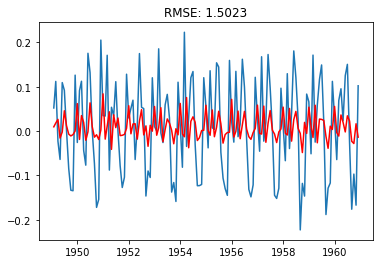

In [44]:
from statsmodels.tsa.arima_model import ARIMA
print('Plotting AR Model')
#plt.figure(figsize=(20,10))
# order=(p=2,i=1,q=2)
model=ARIMA(data_log, order=(2,1,0))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
#the title is giving us the difference in errors. the lower the RSS , the better it is
plt.title('RMSE: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting AR model END')
print('*******')

# MA Model

Plotting MA Model
plotting MA model END
*******


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


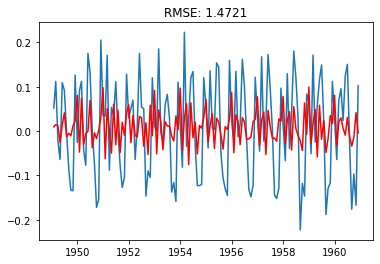

In [45]:
from statsmodels.tsa.arima_model import ARIMA
print('Plotting MA Model')
#plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(0,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RMSE: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting MA model END')
print('*******')

# Model with ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting ARIMA model


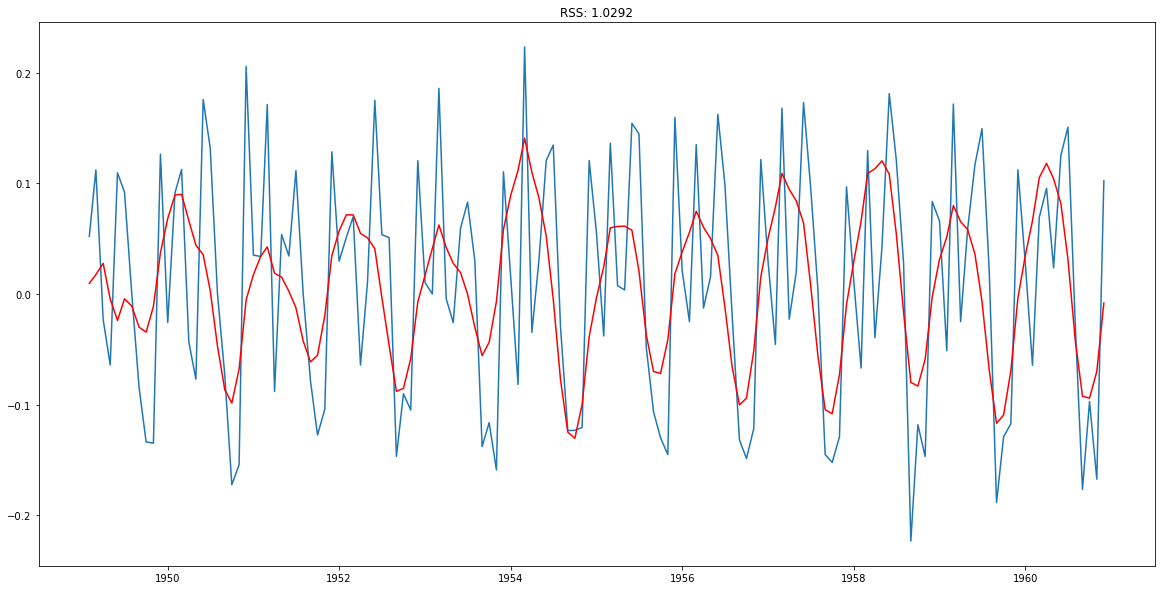

In [46]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

# Get the Predicted values 

In [47]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64



- To remove the differencing we need to do a cumulative SUM
- Performing Inverse Transformation for differencing, by doing cumulative sum

In [50]:
predictions_cum_sum=predictions.cumsum()
#print(predictions_cum_sum.head())
print(predictions_cum_sum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053389
1949-11-01   -0.064668
1949-12-01   -0.027456
1950-01-01    0.040679
1950-02-01    0.130113
1950-03-01    0.220142
1950-04-01    0.286294
1950-05-01    0.330348
1950-06-01    0.365815
1950-07-01    0.368915
1950-08-01    0.321787
1950-09-01    0.235435
1950-10-01    0.136970
1950-11-01    0.069123
1950-12-01    0.063896
1951-01-01    0.081281
1951-02-01    0.115296
1951-03-01    0.157858
1951-04-01    0.176606
1951-05-01    0.191865
1951-06-01    0.194355
1951-07-01    0.181947
1951-08-01    0.139455
1951-09-01    0.078127
1951-10-01    0.022789
1951-11-01    0.003219
1951-12-01    0.037774
1952-01-01    0.094749
1952-02-01    0.166284
1952-03-01    0.237675
1952-04-01    0.292416
1952-05-01    0.343078
1952-06-01    0.384006
1952-07-01    0.381020
1952-08-01    0.334537
1952-

- Below is data display of predicted value in log scale

In [63]:
data_log.head(10)

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


In [62]:
data_log['Passengers'].iloc[0]

4.718498871295094

In [52]:

#predictions_log=pd.Series(data_log['Passengers'].ix[0], index=data_log.index)

predictions_log=pd.Series(data_log['Passengers'].iloc[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Here we need to convert the log to the orginal form. To convert the log to the orginal form we going take the EXPONENTIAL VALUE of the data

In [53]:
predictions_ARIMA=np.exp(predictions_log)

In [54]:
predictions_ARIMA.head()

Month
1949-01-01    112.000000
1949-02-01    113.078123
1949-03-01    115.073415
1949-04-01    118.301989
1949-05-01    117.768367
dtype: float64

In [66]:
data.head(4)
data.shape

(144, 1)

Taking out log transformation and visualizing actual vs predicted value graph

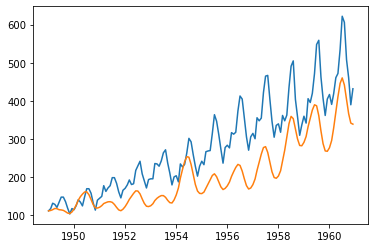

In [55]:

#plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.show()

- Plotting the visual for forecast of next 10 years with 95% confidence interval

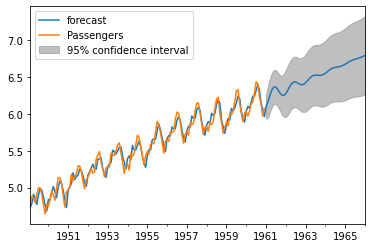

In [61]:
#rcParams['figure.figsize']=20,10

results.plot_predict(1,204)
x=results.forecast(steps=120)

- Next 10 years predicted value on log scale

In [57]:
x[0]

array([6.09553384, 6.15281391, 6.22442954, 6.29241094, 6.34164717,
       6.3635937 , 6.35784701, 6.33139322, 6.29597558, 6.26447727,
       6.24738333, 6.25025173, 6.27275833, 6.30940308, 6.3515149 ,
       6.38988657, 6.41727388, 6.43011066, 6.42906704, 6.41842505,
       6.4045617 , 6.39403627, 6.3918309 , 6.40019507, 6.41833695,
       6.4429541 , 6.4693744 , 6.49293994, 6.51024131, 6.51989048,
       6.52267594, 6.52112403, 6.51864541, 6.51853701, 6.52311932,
       6.53322369, 6.54812878, 6.56591566, 6.5841032 , 6.60036553,
       6.61313281, 6.62192797, 6.62737805, 6.63093145, 6.63438704,
       6.63937999, 6.64696518, 6.65739854, 6.67015338, 6.68414265,
       6.69806642, 6.71077918, 6.7215775 , 6.73034002, 6.73749829,
       6.74386397, 6.75037341, 6.7578261 , 6.76668699, 6.7769984 ,
       6.78841337, 6.80032872, 6.81207214, 6.8230878 , 6.83307157,
       6.84202513, 6.85022333, 6.85811242, 6.86617361, 6.87479172,
       6.88416323, 6.89426405, 6.90487911, 6.9156796 , 6.92632

- Actual predicted value for next 10 years, after taking out log transformation

In [58]:
np.exp(x[0])

array([ 443.8709397 ,  470.03817154,  504.93491563,  540.45476517,
        567.73069016,  580.32814052,  577.00273532,  561.93895548,
        542.3847266 ,  525.56678624,  516.65912943,  518.1432408 ,
        529.93710564,  549.71671122,  573.36063761,  595.78899358,
        612.33154739,  620.24257939,  619.59562325,  613.03685094,
        604.59674286,  598.26647697,  596.94853277,  601.96245271,
        612.98284222,  628.26000584,  645.08004071,  660.46223162,
        671.98855268,  678.50406969,  680.39665447,  679.34155433,
        677.65981052,  677.58636036,  680.69839573,  687.61128658,
        697.93695567,  710.46214363,  723.50191693,  735.36393611,
        744.81272636,  751.39236544,  755.49869399,  758.1880559 ,
        760.81257694,  764.6207734 ,  770.44261823,  778.52300238,
        788.51653871,  799.62482909,  810.83649025,  821.21025961,
        830.12600187,  837.43196292,  843.44803379,  848.83427544,
        854.37773299,  860.76893397,  868.4300065 ,  877.43107

<b>*************************End****************************</b>